In [1]:
#coding:utf-8
import numpy as np 
import pandas as pd 
import xlrd,jieba,re
import matplotlib # matplotlib畫出的圖片嵌在jupyter notebook上面
%matplotlib inline 
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator # 詞雲的套件
import warnings # 忽略warning警告
warnings.filterwarnings('ignore') 

讀取檔案並觀察所有分類，將不同分類的取出

In [2]:
data = pd.read_excel('data/news_data_2019.xlsx',encoding='utf-8')
data.dropna() 
data.head(5)

,id,name,title,post_time,content
0,1546302938597_N01,兩岸新聞,34萬港人新年倒數 觀賞煙火匯演,2019-01-01 08:28:00,34萬港人新年倒數 觀賞煙火匯演最新更新：2019/01/01 08:28（中央社記者張謙香...
1,1546312841299_N01,兩岸新聞,陸電商法實施 網購代購業震盪,2019-01-01 11:09:00,陸電商法實施 網購代購業震盪最新更新：2019/01/01 11:09（中央社台北1日電）中...
2,1546313738101_N01,兩岸新聞,靜安寺跨年千人撞鐘 為搶頭香排3小時,2019-01-01 11:31:00,靜安寺跨年千人撞鐘 為搶頭香排3小時最新更新：2019/01/01 11:31上海靜安寺新年...
3,1546315538383_N01,兩岸新聞,瘋狂傳銷鼓吹吃衛生棉 陸女臥底救男友,2019-01-01 11:47:00,瘋狂傳銷鼓吹吃衛生棉 陸女臥底救男友最新更新：2019/01/01 11:47（中央社台北1...
4,1546317330203_N01,兩岸新聞,傳中國建成無線電磁法直通深海 但有害人體,2019-01-01 12:26:00,傳中國建成無線電磁法直通深海 但有害人體最新更新：2019/01/01 12:26（中央社記...


In [3]:
news_class = set(data.name.values.tolist())
news_class

{'兩岸新聞', '國際新聞', '政治新聞', '社會新聞', '財經新聞'}

In [4]:
chinaAndtw_news = data[ data.name == '兩岸新聞' ]
international_news = data[ data.name == '國際新聞' ]
political_news = data[ data.name == '政治新聞' ]
social_news = data[ data.name == '社會新聞' ]
financial_news = data[ data.name == '財經新聞' ]

將不同的主題用ckiptagger斷詞、去除停用詞、統計詞頻然後製作詞雲

In [5]:
#讀取停用詞
stop_list = []
with open('data/stopwords.txt','r',encoding='utf-8') as f:
    for line in f.readlines():
        stop_list.append(line.strip())

In [6]:
#斷詞、去停用詞
def preprocess(news_data):
    news_list = (news_data['title']+news_data['content']).values.tolist()
    segment_result= []
    for anew in news_list:
        anew = re.sub(r'[^\w]','',anew)
        anew = re.sub(r'[A-Za-z0-9]','',anew)
        anew = re.sub(u'[\uFF01-\uFF5A]','',anew)
        segment_list = jieba.lcut(anew)
        for segment in segment_list:
            if(segment not in stop_list and len(segment)>1):
                segment_result.append(segment)
    segment_table = pd.DataFrame({'segment':segment_result})
    print('***preprocessing step has finished***')
    return segment_table

In [7]:
#統計詞頻
def calculate_freq(segment_table):
    news_group = segment_table.groupby(by=['segment'])['segment'].agg({"count":np.size})
    news_group = news_group.reset_index().sort_values(by=['count'],ascending=False)
    print('***frequency calculating step has finished***\n')
    # print(news_group.head())
    return news_group

In [8]:
#製作詞雲
def newscloud(news_data):
    news_table = preprocess(news_data)
    news_group = calculate_freq(news_table)
    wordcloud = WordCloud(font_path='data/setting/simhei.ttf',background_color='black',max_font_size=60)
    word_frequence = {data[0]:data[1] for data in news_group.head(1000).values}
    news_cloud = wordcloud.fit_words(word_frequence)
    matplotlib.rcParams['figure.figsize'] = (8.0, 4.0) #設定圖片大小
    plt.axis("off") #去掉座標軸
    plt.imshow(news_cloud)

In [11]:
#用自己的圖製作詞雲
def self_newscloud(news_data):
    import imageio #Scipy中代替imread
    news_table = preprocess(news_data)
    news_group = calculate_freq(news_table)
    img = imageio.imread('data/setting/temp.jpg') #替換成自己的圖片
    wordcloud = WordCloud(font_path='data/setting/simhei.ttf',background_color='white',max_font_size=60,mask=img)
    word_frequence = {data[0]:data[1] for data in news_group.head(800).values}
    news_cloud = wordcloud.fit_words(word_frequence)
    imgColor = ImageColorGenerator(img)
    matplotlib.rcParams['figure.figsize'] = (8.0, 4.0) 
    plt.axis("off")
    plt.imshow(wordcloud.recolor(color_func=imgColor))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/vk/4wfw6yvn67b0gpkhvj8wy0cw0000gn/T/jieba.cache
Loading model cost 1.360 seconds.
Prefix dict has been built succesfully.
***preprocessing step has finished***
***frequency calculating step has finished***



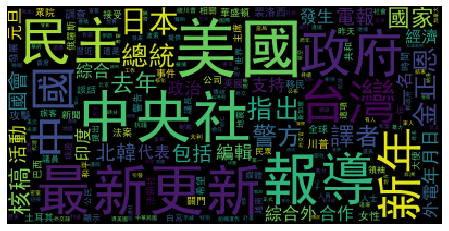

In [9]:
newscloud(international_news[:300]) #只取前100筆資料

***preprocessing step has finished***
***frequency calculating step has finished***



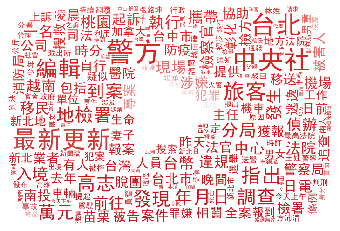

In [13]:
self_newscloud(social_news[:300])